# Лабораторная работа №18 Деревья решений и случайный лес

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')
print(df.info(), "\n")
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None 



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# отбор числовых колонок (Числовые признаки)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
df_numeric

['id' 'age' 'hypertension' 'heart_disease' 'avg_glucose_level' 'bmi'
 'stroke']


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [4]:
# отбор нечисловых колонок (Категориальные признаки)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
df_non_numeric

['gender' 'ever_married' 'work_type' 'Residence_type' 'smoking_status']


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


# Обучение (создание) дерева

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # модуль для деревьев
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = df_numeric.dropna()

# data['Категория'] = pd.cut(data['age'], bins=[0, 25, 45, 90], labels=['Молодой', 'Средний', 'Пожилой'])
# data = data.drop(columns=['age'])
# print(data['Категория'].value_counts())
data['Категория'] = pd.cut(data['stroke'], bins=[-1, 0, 1], labels=['Здоровый', 'Больной'])
data = data.drop(columns=['stroke'])
print(data['Категория'].value_counts())
data

Здоровый    4700
Больной      209
Name: Категория, dtype: int64


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Категория
0,9046,67.0,0,1,228.69,36.6,Больной
2,31112,80.0,0,1,105.92,32.5,Больной
3,60182,49.0,0,0,171.23,34.4,Больной
4,1665,79.0,1,0,174.12,24.0,Больной
5,56669,81.0,0,0,186.21,29.0,Больной
...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,Здоровый
5106,44873,81.0,0,0,125.20,40.0,Здоровый
5107,19723,35.0,0,0,82.99,30.6,Здоровый
5108,37544,51.0,0,0,166.29,25.6,Здоровый


In [ ]:
from imblearn.over_sampling import RandomOverSampler

sampling_strategy = 0.8
autopct = "%.2f"

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
ax = y_s.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Over-sampling")
plt.show()
X_s

In [6]:
X=data[['avg_glucose_level', 'age']]
y=data.iloc[:,6]

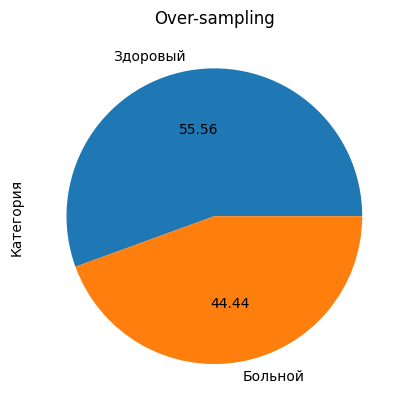

,avg_glucose_level,age
0,228.69,67.0
1,105.92,80.0
2,171.23,49.0
3,174.12,79.0
4,186.21,81.0
...,...,...
8455,207.28,76.0
8456,84.03,82.0
8457,219.73,73.0
8458,86.62,82.0


In [7]:
from imblearn.over_sampling import RandomOverSampler

sampling_strategy = 0.8
autopct = "%.2f"

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
ax = y_s.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Over-sampling")
plt.show()
X_s

In [9]:
y_s.value_counts()

Здоровый    4700
Больной     3760
Name: Категория, dtype: int64

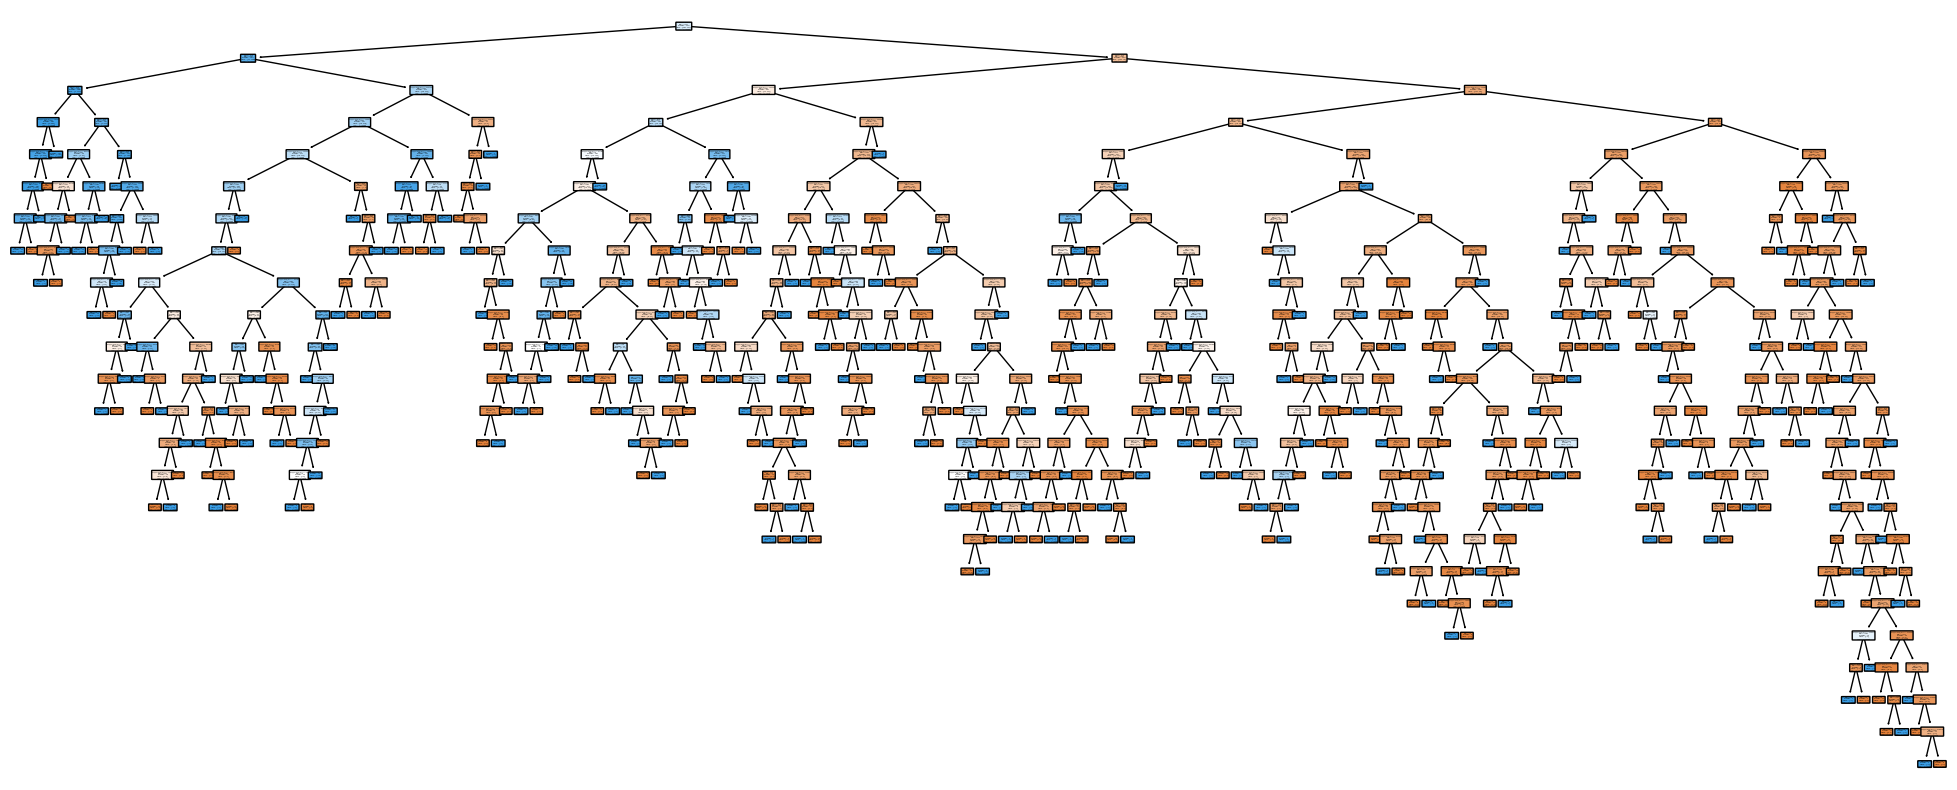

Проверка на новом образце ['Здоровый']


In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

clf = DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
y_score=clf.predict(X_test)
plt.figure(figsize=((25,10)))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=y.unique(), rounded=True)
plt.show()

# проверка на новых образцах
sample_1=clf.predict([[40,20]])
print(f"Проверка на новом образце {sample_1}")

In [11]:
import graphviz # подключаем библиотеку для отображения деревьев
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл)
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
# graph.render("Пациенты") # отображаем в файл (по умолчанию pdf)

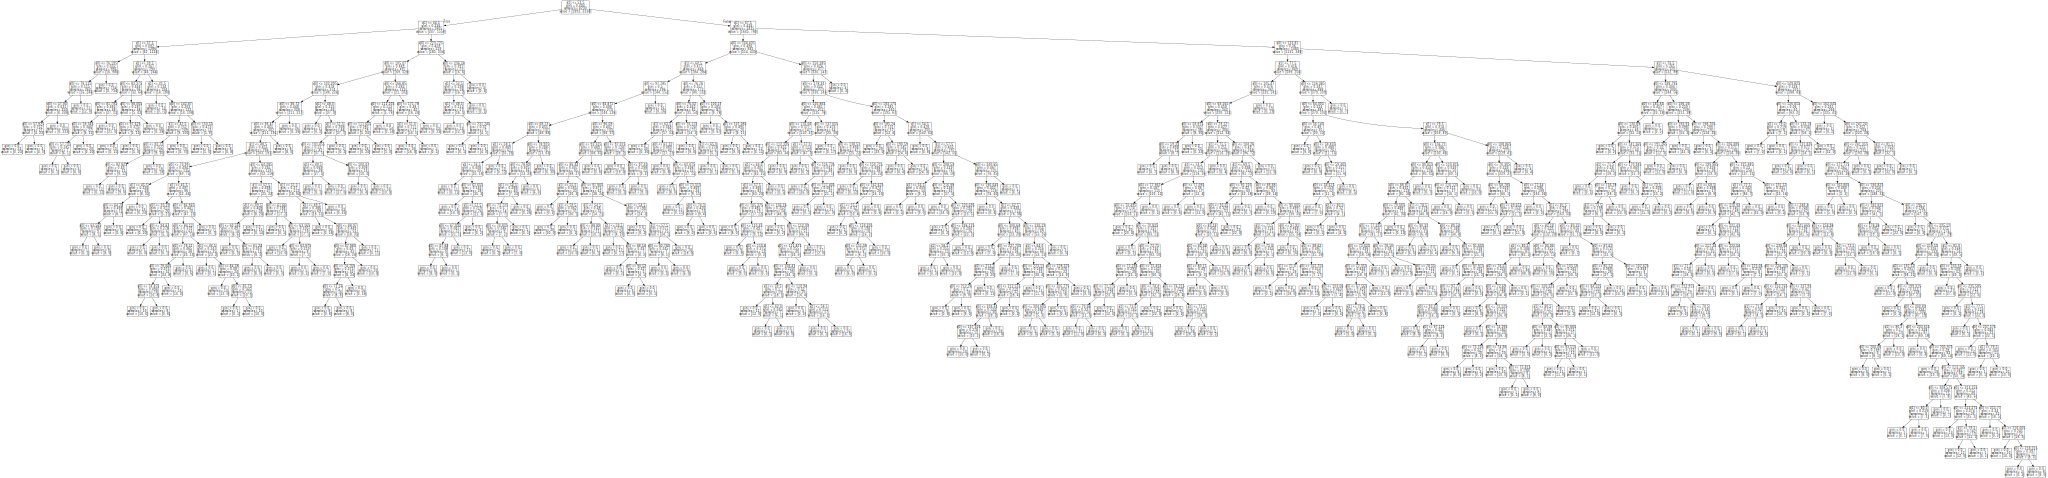

In [12]:
graphviz.Source(dot_data)

In [13]:
from sklearn.tree import export_text # подключаем функцию

r = export_text(clf, feature_names=X.columns.tolist()) # переводим дерево в текстовую строку
print(r) # печатаем

|--- age <= 53.50
|   |--- age <= 44.50
|   |   |--- age <= 37.50
|   |   |   |--- avg_glucose_level <= 76.19
|   |   |   |   |--- avg_glucose_level <= 76.12
|   |   |   |   |   |--- avg_glucose_level <= 57.94
|   |   |   |   |   |   |--- avg_glucose_level <= 57.92
|   |   |   |   |   |   |   |--- class: Здоровый
|   |   |   |   |   |   |--- avg_glucose_level >  57.92
|   |   |   |   |   |   |   |--- class: Больной
|   |   |   |   |   |--- avg_glucose_level >  57.94
|   |   |   |   |   |   |--- class: Здоровый
|   |   |   |   |--- avg_glucose_level >  76.12
|   |   |   |   |   |--- class: Больной
|   |   |   |--- avg_glucose_level >  76.19
|   |   |   |   |--- class: Здоровый
|   |   |--- age >  37.50
|   |   |   |--- age <= 39.50
|   |   |   |   |--- avg_glucose_level <= 83.38
|   |   |   |   |   |--- avg_glucose_level <= 81.79
|   |   |   |   |   |   |--- avg_glucose_level <= 59.34
|   |   |   |   |   |   |   |--- avg_glucose_level <= 57.74
|   |   |   |   |   |   |   |   |--- class:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1868
           1       1.00      0.92      0.96      2362

    accuracy                           0.96      4230
   macro avg       0.96      0.96      0.96      4230
weighted avg       0.96      0.96      0.96      4230

[1 0 1 ... 0 0 1]
[[1868    0]
 [ 178 2184]]


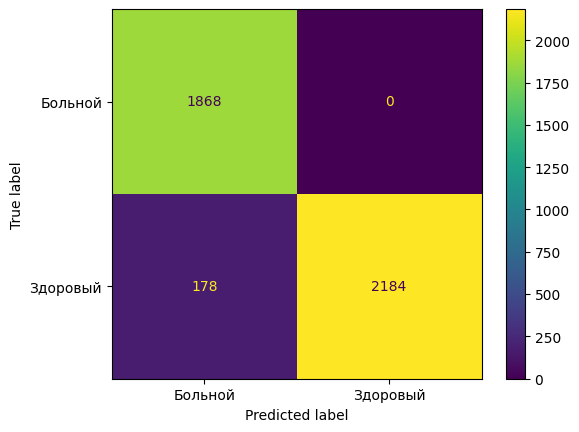

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# score = clf.score(X_test, y_test) # считаем среднюю точность
# print(score)
y_score1 = np.where(y_score == "Здоровый", 1, 0)
# оценка точности модели
print(metrics.classification_report(y_test, y_score))
# матрица неточности
print(y_score)
cm = confusion_matrix(y_test, y_score)
print(cm)
cm = confusion_matrix(y_test, y_score)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

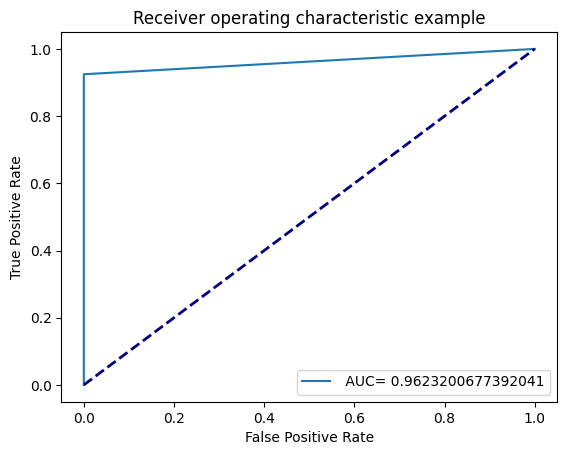

In [34]:
# y_test = y_test.map({'Здоровый': 1, 'Больной': 0}).astype(int)

fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

lw = 2
#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

# Случайный лес

0.7884160756501182
              precision    recall  f1-score   support

     Больной       0.73      0.83      0.78      1868
    Здоровый       0.85      0.76      0.80      2362

    accuracy                           0.79      4230
   macro avg       0.79      0.79      0.79      4230
weighted avg       0.80      0.79      0.79      4230

[[1542  326]
 [ 569 1793]]


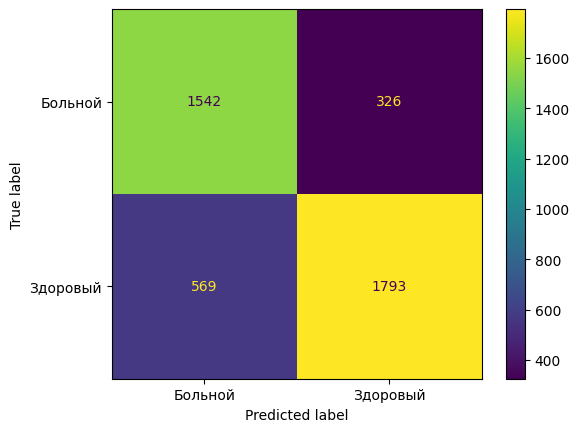

In [14]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns # для простого отображения

# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# максимальная глубина дерева
                             n_estimators=10,# число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score = clf.score(X_test, y_test) # считаем среднюю точность
print(score)

# оценка точности модели
print(metrics.classification_report(y_test, y_pred))
# матрица неточности
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [15]:
from sklearn. linear_model import LogisticRegression

y_test = y_test.map({'Здоровый': 1, 'Больной': 0}).astype(int)

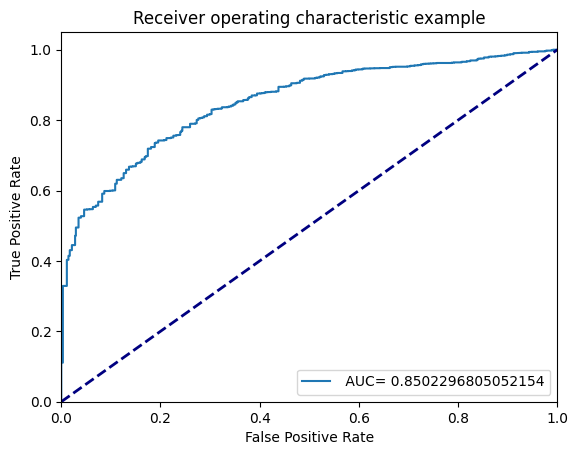

In [16]:
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

lw = 2
#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

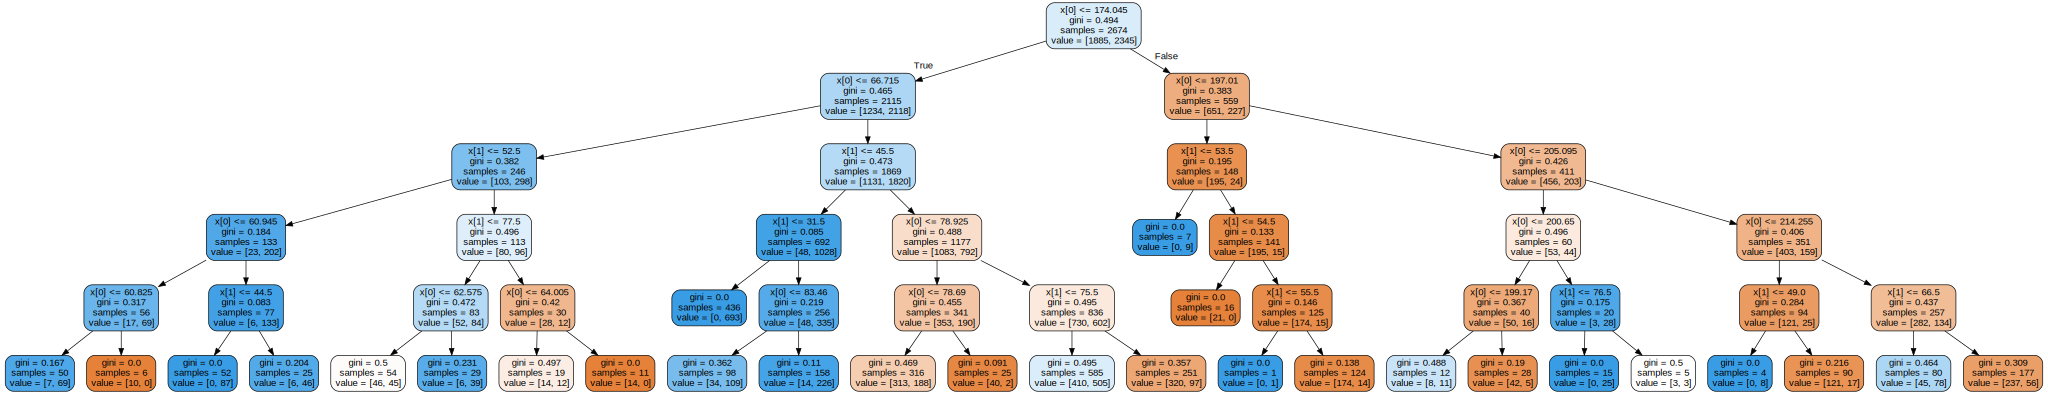

In [17]:
tree_data=clf.estimators_[2] # третье дерево

from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_data, out_file=None, # можем указать дополнительные опции конвертации
             filled=True, rounded=True) # прочие детали отображения
graph = graphviz.Source(dot_data) # # загружаем дерево из переменной или файла в представление graphviz
graph # отображаем на экране